In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import os
import warnings # This is a library that handles warnings.
warnings.filterwarnings("ignore") 
plt.style.use('fivethirtyeight')

In [2]:
#Import ".json" file for countries
path =(r"C:\Users\hardjan\Retail Supermarket")
df= pd.read_csv(os.path.join(path,'02 Data','Original Data','Electric_Production[1].csv'))

In [3]:
df.shape

(397, 2)

In [4]:
df.head()

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151


In [5]:
df_test=df.loc[:,['DATE', 'IPG2211A2N']].head()
df_test.set_index('DATE', inplace=True)
df_test.head()

,IPG2211A2N
DATE,
1/1/1985,72.5052
2/1/1985,70.6720
3/1/1985,62.4502
4/1/1985,57.4714
5/1/1985,55.3151


#### 04. Create a line chart of your data.

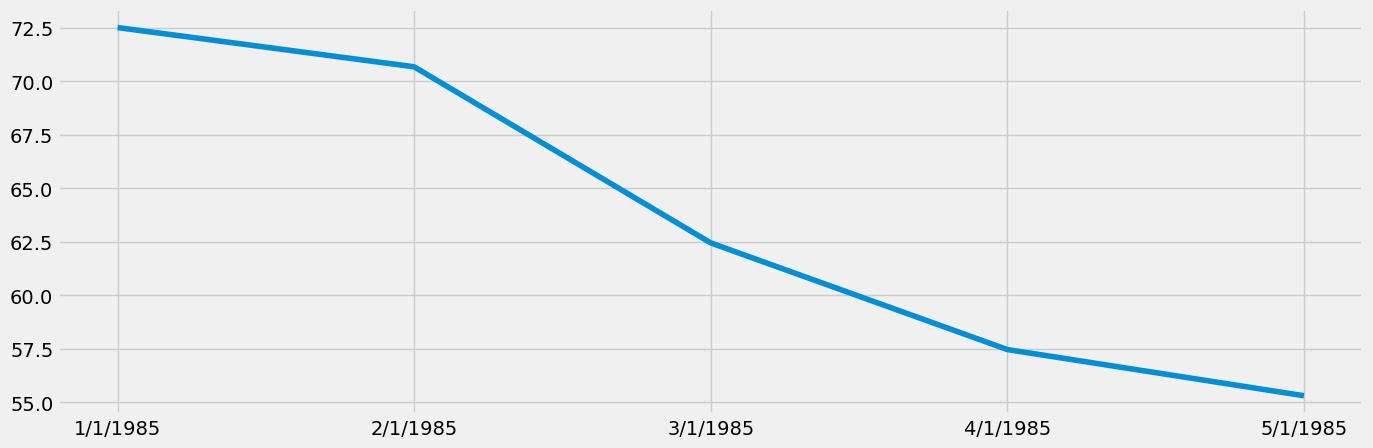

In [6]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_test)

In [7]:
df.head()

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151


.

In [8]:
df_year=df.groupby("DATE").agg({'IPG2211A2N':['median']})

In [9]:
df_year.head(17)

,IPG2211A2N
,median
DATE,
1/1/1985,72.5052
1/1/1986,73.3057
1/1/1987,73.8152
1/1/1988,79.8703
1/1/1989,77.9188
1/1/1990,84.3598
1/1/1991,86.0214
1/1/1992,85.2855


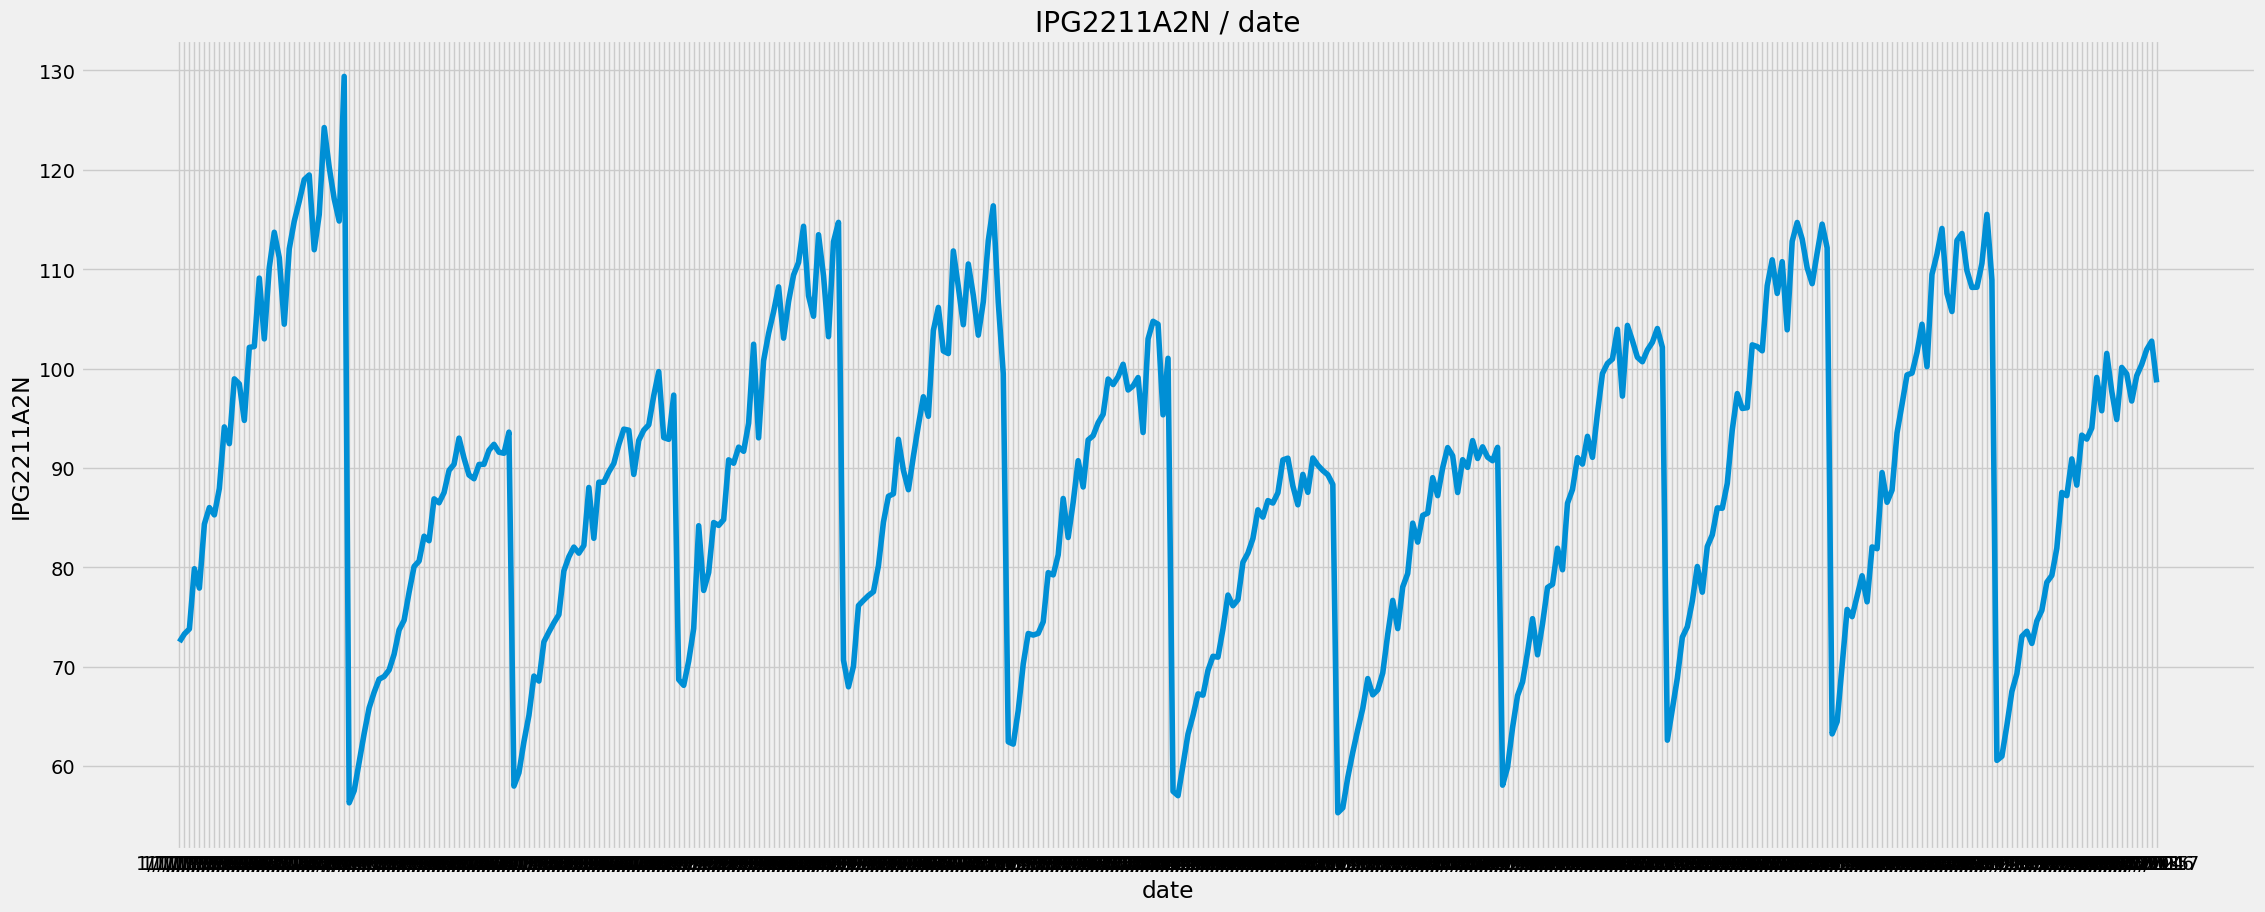

In [10]:

plt.figure(figsize=(25,10), dpi=100)
plt.title("IPG2211A2N / date" )
plt.xlabel("date")
plt.ylabel("IPG2211A2N")
plt.plot(df_year)

In [11]:
df_year.isnull().sum() 

IPG2211A2N  median    0
dtype: int64

In [12]:
dups = df_year.duplicated()
dups.sum()

0

In [13]:
df_year.index.freq = 'M'

#### 05. Decompose the data’s components.
Analyze the results from the plot in a markdown cell.

In [14]:
decomposition = sm.tsa.seasonal_decompose(df_year, model='additive', period=8)

In [15]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

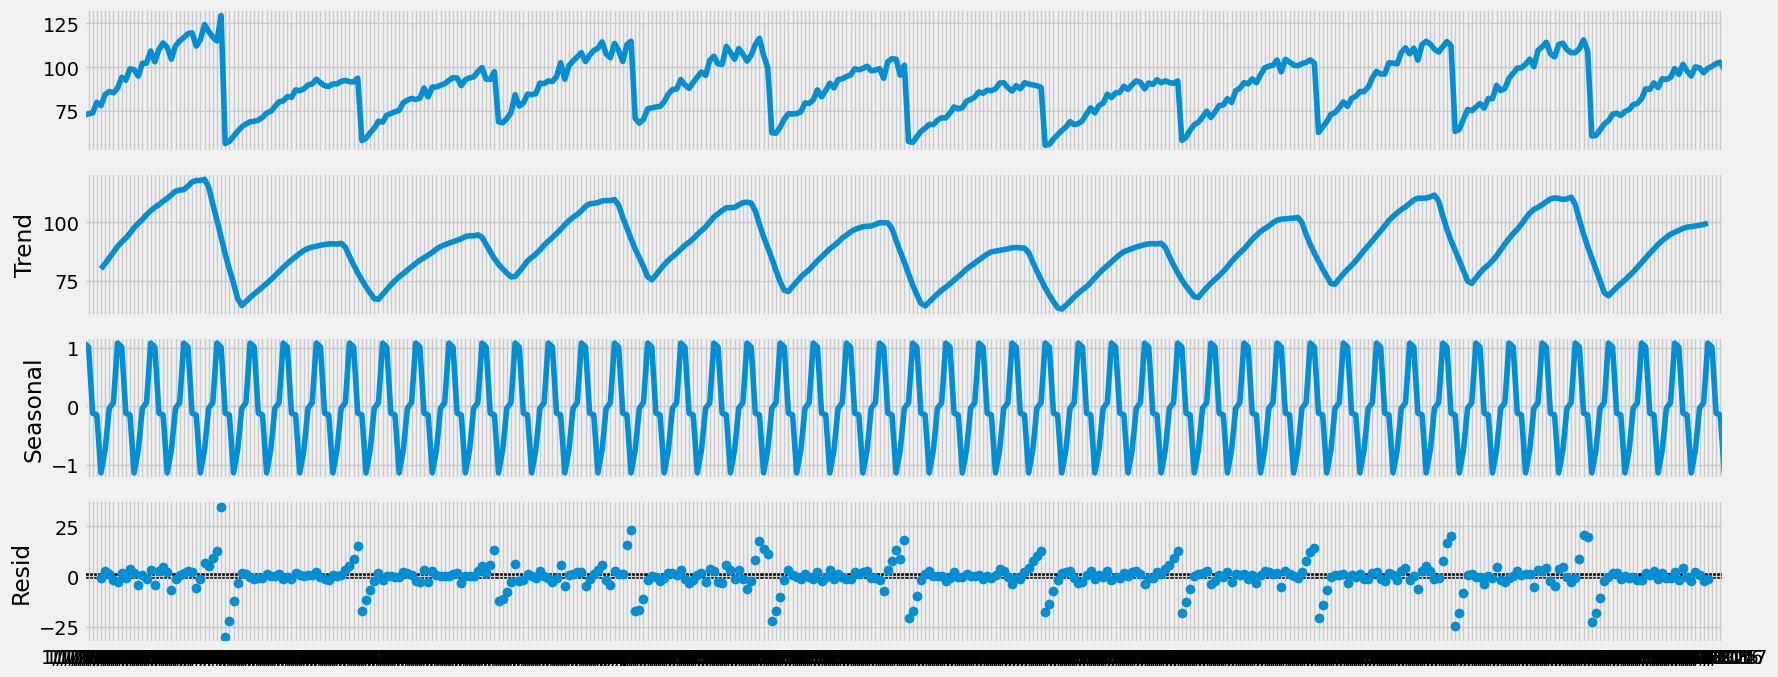

In [16]:
decomposition.plot()
plt.show()

##### The outcome is just like a sesonal trend which goes up and down with season going up and down 

In [17]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df_year['IPG2211A2N'])



Dickey-Fuller Stationarity test:
Test Statistic                  -5.494674
p-value                          0.000002
Number of Lags Used              0.000000
Number of Observations Used    396.000000
Critical Value (1%)             -3.446972
Critical Value (5%)             -2.868866
Critical Value (10%)            -2.570673
dtype: float64


**p-value < 0.05 and Test Statistic < Critical values**

**=>   reject the null hypothesis and the data is stationary**

#### 09. Check your data’s autocorrelations.

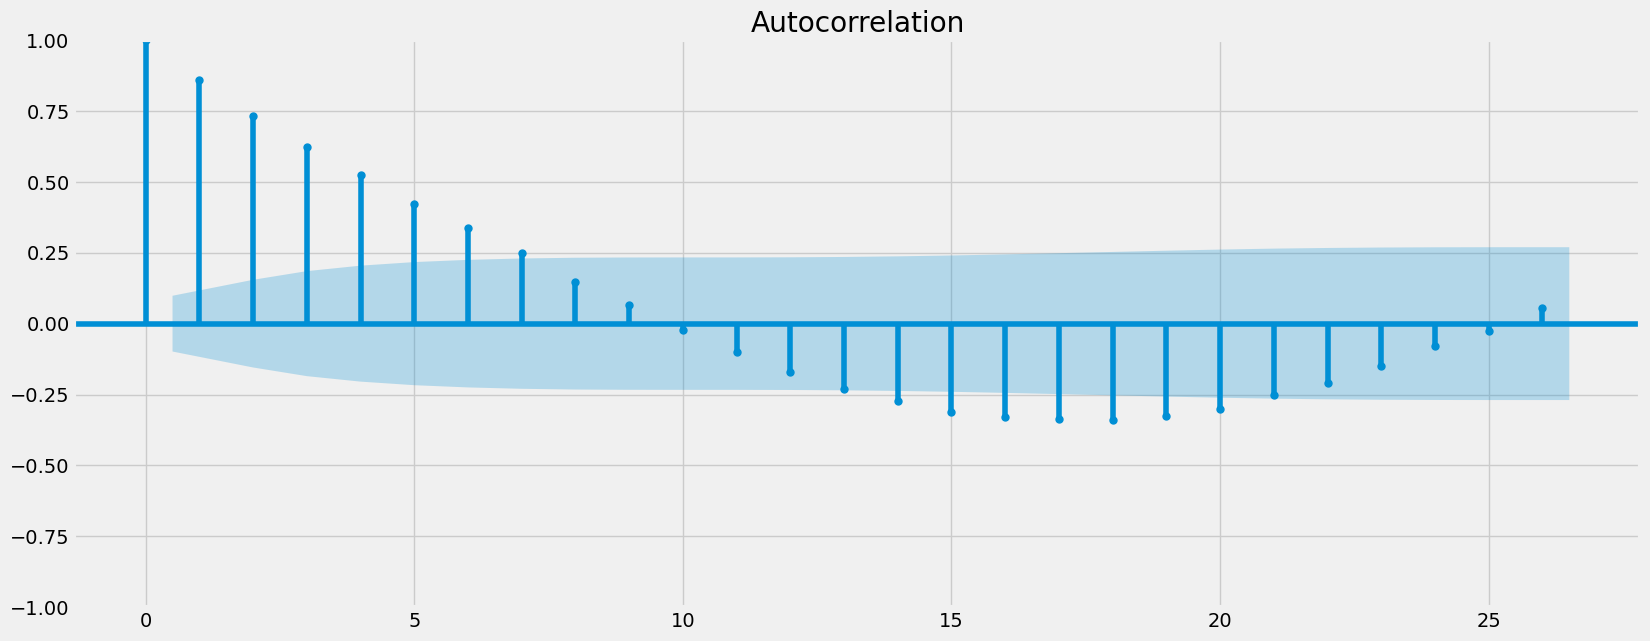

In [18]:

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(df_year)
plt.show()

### Stationarizing: Differencing